<a href="https://colab.research.google.com/github/hieunguyen-1510/Customer_Shopping-Trends/blob/main/Customer_Shopping_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer

# Cài đặt cấu hình cho biểu đồ
sns.set(style='whitegrid')
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

# Giải thích về các màu sắc

Trong dự án này, chúng tôi đã sử dụng một bảng màu đa dạng để tạo sự thu hút và truyền đạt thông điệp cho các biểu đồ và trực quan hóa dữ liệu. Dưới đây là giải thích chi tiết về từng màu sắc:

1. **Baby Blue (#89CFF0)**:
   - Màu xanh nhạt này thường được liên kết với sự nhẹ nhàng, bình yên và trong sáng, mang lại cảm giác thư giãn cho người xem.

2. **Hot Pink (#FF69B4)**:
   - Đây là một màu hồng tươi sáng và nổi bật, gợi lên sự vui vẻ, năng động và trẻ trung, thể hiện sự lôi cuốn và quyến rũ.

3. **Gold (#FFD700)**:
   - Màu vàng ánh kim này tượng trưng cho sự sang trọng, thành công và giá trị cao, thường được liên kết với sự thịnh vượng và thành tựu.

4. **Medium Slate Blue (#7B68EE)**:
   - Màu xanh lam này mang đến sự tươi sáng và sảng khoái, tạo cảm giác bình tĩnh và ổn định.

5. **Orange Red (#FF4500)**:
   - Màu cam đỏ nổi bật này biểu thị sự nhiệt huyết, đam mê và năng lượng, thu hút sự chú ý và thể hiện sự quyết tâm.

6. **Medium Purple (#9370DB)**:
   - Màu tím nhạt này thường được liên kết với sự sáng tạo, trí tưởng tượng và sự huyền bí, mang đến cảm giác độc đáo.

7. **Lime Green (#32CD32)**:
   - Màu xanh lá chanh này tượng trưng cho sự tươi mới, sức sống và sự phát triển, gợi lên cảm giác tự nhiên và thân thiện với môi trường.

8. **Blue Violet (#8A2BE2)**:
   - Màu xanh tím này mang lại cảm giác bí ẩn và sâu sắc, thường được sử dụng để thể hiện sự sáng tạo và tinh tế.

9. **Tomato (#FF6347)**:
   - Màu đỏ tươi này gợi lên cảm giác vui vẻ và tươi sáng, thể hiện sự hấp dẫn và năng lượng tích cực.

10. **Light Sea Green (#20B2AA)**:
    - Màu xanh biển nhẹ này tượng trưng cho sự yên bình và thư giãn, liên kết với cảm giác trong lành và tự nhiên.

11. **Dark Turquoise (#00CED1)**:
    - Màu turquoise tối này tươi mát và sinh động, thể hiện sự tự do và không gian mở.

12. **Coral (#FF7F50)**:
    - Màu san hô này mang đến cảm giác ấm áp và thoải mái, thường được liên kết với sự tươi sáng và vui vẻ.

13. **Chartreuse (#7FFF00)**:
    - Màu xanh lá cây này thể hiện sự tươi mới, sức sống và sự năng động, tạo ra cảm giác tràn đầy năng lượng.

14. **Orchid (#DA70D6)**:
    - Màu tím nhạt này mang lại sự tinh tế và lãng mạn, thường được sử dụng để thể hiện vẻ đẹp và sự quyến rũ.

Các màu sắc này không chỉ làm cho biểu đồ trở nên thu hút hơn mà còn truyền tải ý nghĩa sâu sắc cho người xem. Nếu cần thêm thông tin hoặc ý kiến về cách sử dụng màu sắc trong trực quan hóa, hãy cho tôi biết!


In [59]:
# Tải dữ liệu lên
df = pd.read_csv('/content/sample_data/shopping_trends_updated.csv')
df.head(10) # Hiển thị 10 dòng đầu tiên

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


_Customer ID: Mã định danh duy nhất cho mỗi khách hàng

_Age: Tuổi của khách hàng

_Gender: Giới tính của khách hàng (Nam/Nữ)

_Item Purchased: Sản phẩm mà khách hàng đã mua

_Category: Loại sản phẩm đã mua

_Purchase Amount (USD): Số tiền mua hàng bằng USD

_Location: Địa điểm nơi giao dịch được thực hiện

_Size: Kích cỡ của sản phẩm đã mua

_Color: Màu sắc của sản phẩm đã mua

_Season: Mùa mà giao dịch được thực hiện

_Review Rating: Đánh giá của khách hàng cho sản phẩm đã mua

_Subscription Status: Khách hàng có đăng ký (Có/Không)

_Shipping Type: Loại hình vận chuyển mà khách hàng đã chọn

_Discount Applied: Đã áp dụng giảm giá cho giao dịch (Có/Không)

_Promo Code Used: Khách hàng có sử dụng mã khuyến mãi (Có/Không)

_Previous Purchases: Tổng số lần mua hàng trước đó của khách hàng tại cửa hàng, _không tính giao dịch hiện tại

_Payment Method: Phương thức thanh toán ưa thích của khách hàng

_Frequency of Purchases: Tần suất mua hàng của khách hàng (Ví dụ: Hàng tuần, Hai tuần một lần, Hàng tháng)

Data preprocessing

In [60]:
# Xem kích thước của tập dữ liệu
rows, col = df.shape
print("Dimensions of dataset: {}".format(df.shape))
print('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (3900, 18)
Rows: 3900 
Columns: 18


In [62]:
# Xuất thông tin kiểu dữ liệu của từng cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [63]:
df.describe() #Thông kê mô tả dữ liệu

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [64]:
# Xử lý các giá trị thiếu
df_filled = df.fillna({
    'Age': df['Age'].mean(),
    'Gender': df['Gender'].mode()[0],
    'Purchase Amount (USD)': df['Purchase Amount (USD)'].mean(),
    'Category': df['Category'].mode()[0],
    'Location': df['Location'].mode()[0],
    'Review Rating': df['Review Rating'].mean(),
    'Size': df['Size'].mode()[0],
    'Color': df['Color'].mode()[0]
})

In [65]:
# Kiểm tra trùng lặp dữ liệu
print(f"Số bản ghi trùng lặp: {df.duplicated().sum()}")

Số bản ghi trùng lặp: 0


In [68]:
# Mã hóa các biến phân loại bằng LabelEncoder
encoder = LabelEncoder()
df_encoded = df_filled.copy()
categorical_columns = ['Gender', 'Category', 'Location', 'Size', 'Color', 'Season', 'Shipping Type', 'Payment Method']
for column in categorical_columns:
    df_encoded[column] = encoder.fit_transform(df_filled[column])

# Kiểm tra lại dữ liệu đã được mã hóa
print(df_encoded.head())

   Customer ID  Age  Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55       1         Blouse         1                     53   
1            2   19       1        Sweater         1                     64   
2            3   50       1          Jeans         1                     73   
3            4   21       1        Sandals         2                     90   
4            5   45       1         Blouse         1                     49   

   Location  Size  Color  Season  Review Rating Subscription Status  \
0        16     0      7       3            3.1                 Yes   
1        18     0     12       3            3.1                 Yes   
2        20     2     12       1            3.1                 Yes   
3        38     1     12       1            3.5                 Yes   
4        36     1     21       1            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0              1         

In [69]:
print(df_encoded.columns) #Hiển thị tên các cột

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')


Data visualization

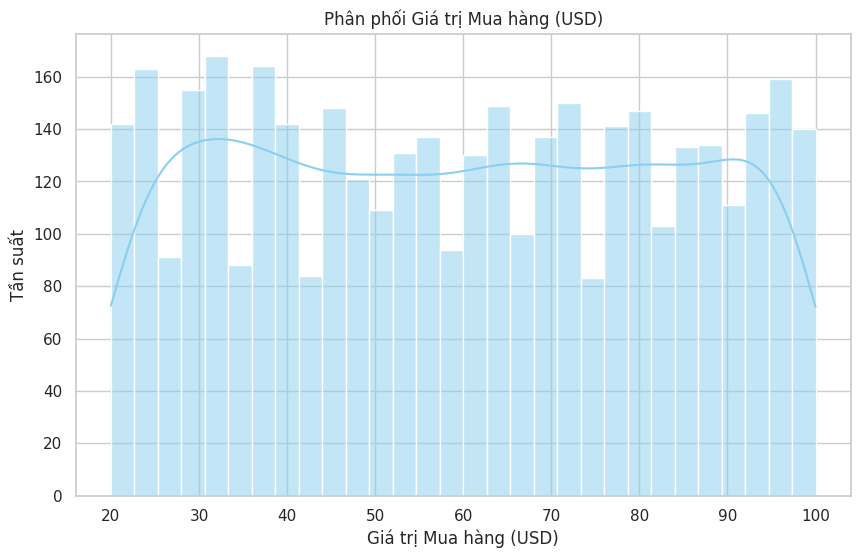

In [72]:
# 1. Biểu đồ Histogram cho Purchase Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase Amount (USD)'], bins=30, kde=True, color=colors[0])
plt.title('Phân phối Giá trị Mua hàng (USD)')
plt.xlabel('Giá trị Mua hàng (USD)')
plt.ylabel('Tần suất')
plt.show()

<ipython-input-73-e5403e2cd0cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette='Set2')


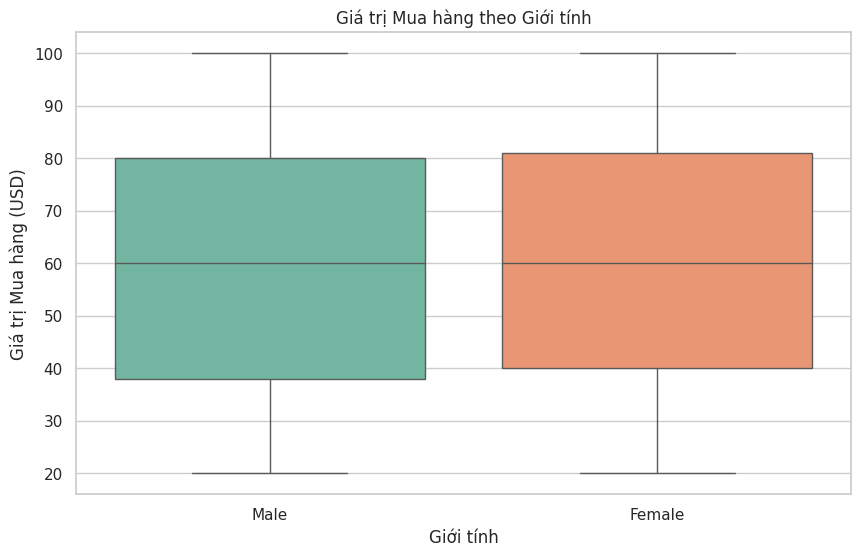

In [73]:
# 2. Biểu đồ Boxplot cho Purchase Amount theo Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette='Set2')
plt.title('Giá trị Mua hàng theo Giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Giá trị Mua hàng (USD)')
plt.show()

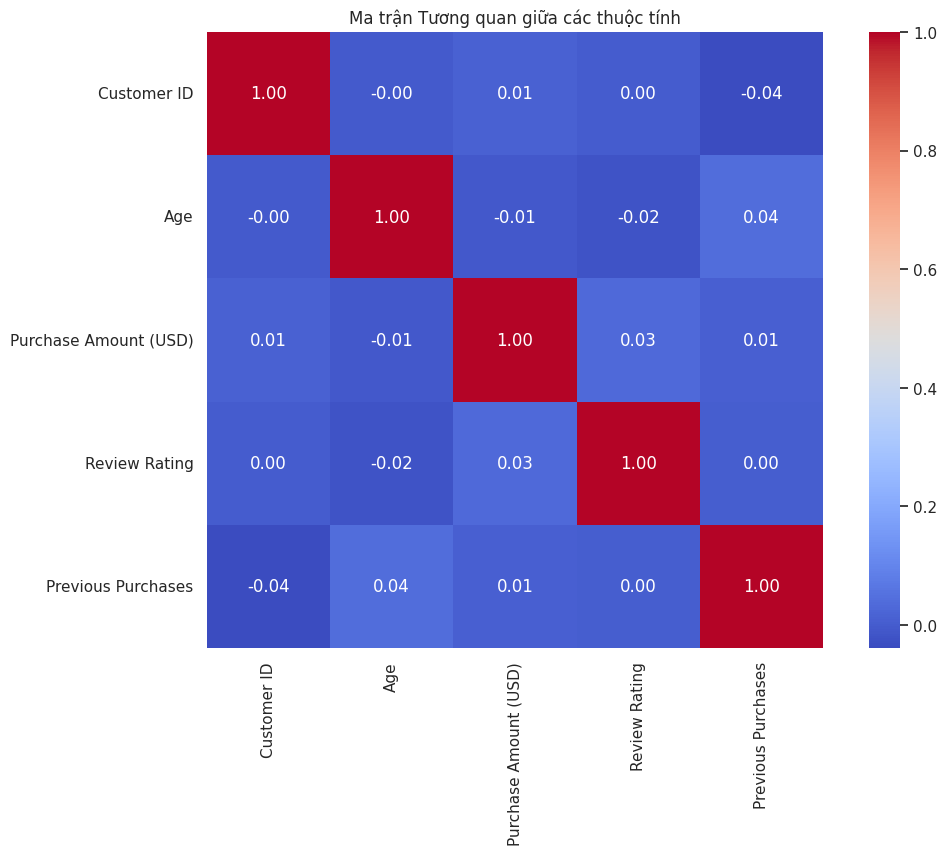

In [74]:
# 3. Biểu đồ Heatmap cho ma trận tương quan
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Ma trận Tương quan giữa các thuộc tính')
plt.show()

<ipython-input-75-2d1640672a1a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Subscription Status', data=df, palette='pastel')


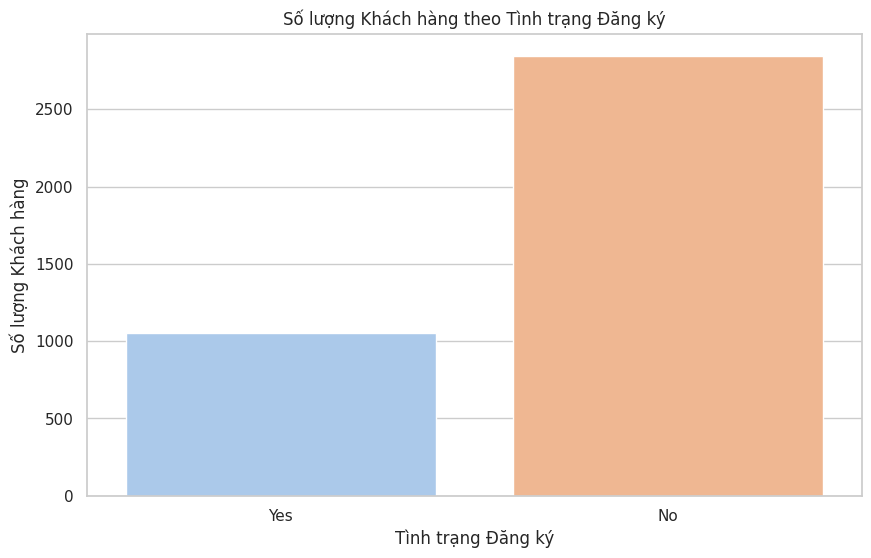

In [75]:
# 4. Biểu đồ Bar cho số lượng khách hàng theo Subscription Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Subscription Status', data=df, palette='pastel')
plt.title('Số lượng Khách hàng theo Tình trạng Đăng ký')
plt.xlabel('Tình trạng Đăng ký')
plt.ylabel('Số lượng Khách hàng')
plt.show()

<ipython-input-76-229914f94035>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='viridis')


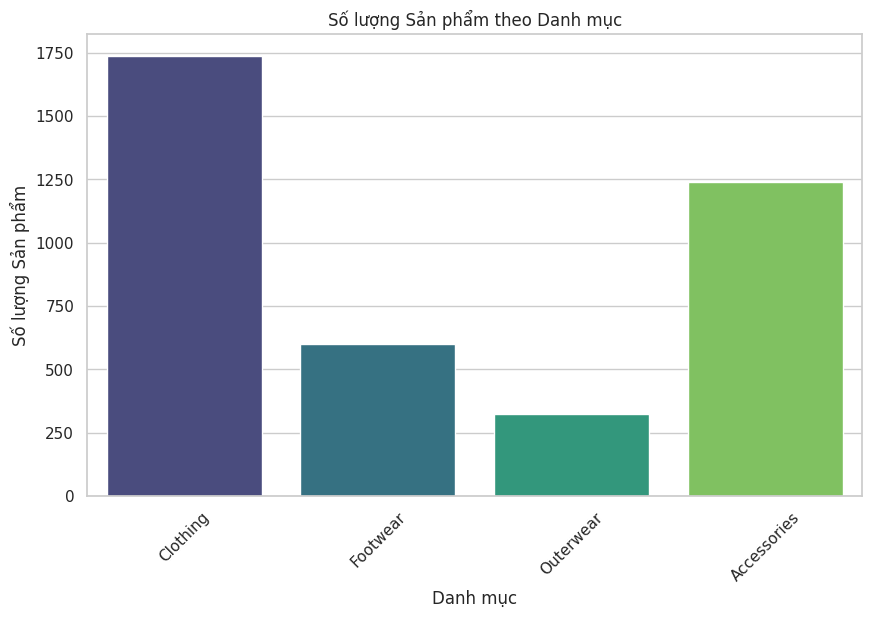

In [76]:
# 5. Biểu đồ Bar cho số lượng sản phẩm theo Category
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df, palette='viridis')
plt.title('Số lượng Sản phẩm theo Danh mục')
plt.xlabel('Danh mục')
plt.ylabel('Số lượng Sản phẩm')
plt.xticks(rotation=45)
plt.show()

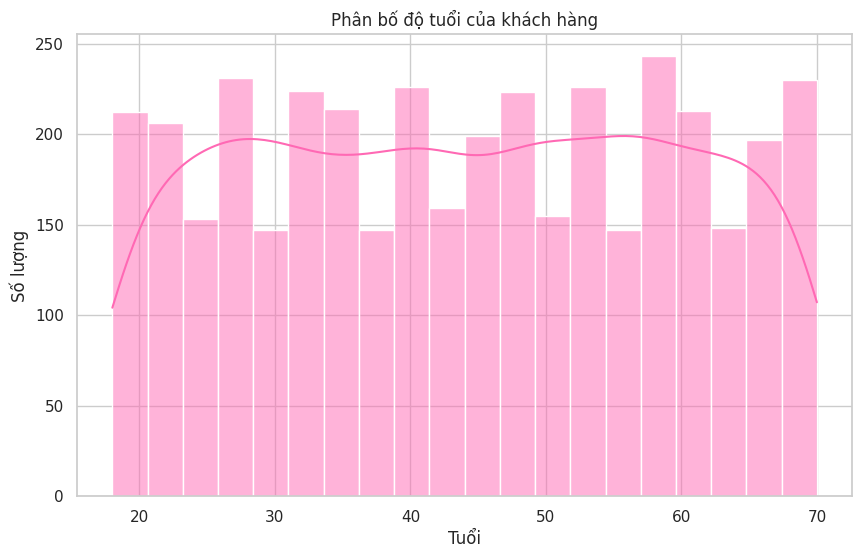

In [77]:
# 6. Trực quan hóa phân bố độ tuổi của khách hàng
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color=colors[1])
plt.title('Phân bố độ tuổi của khách hàng')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')
plt.show()

<ipython-input-78-470c6b20ee89>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette='Set2')


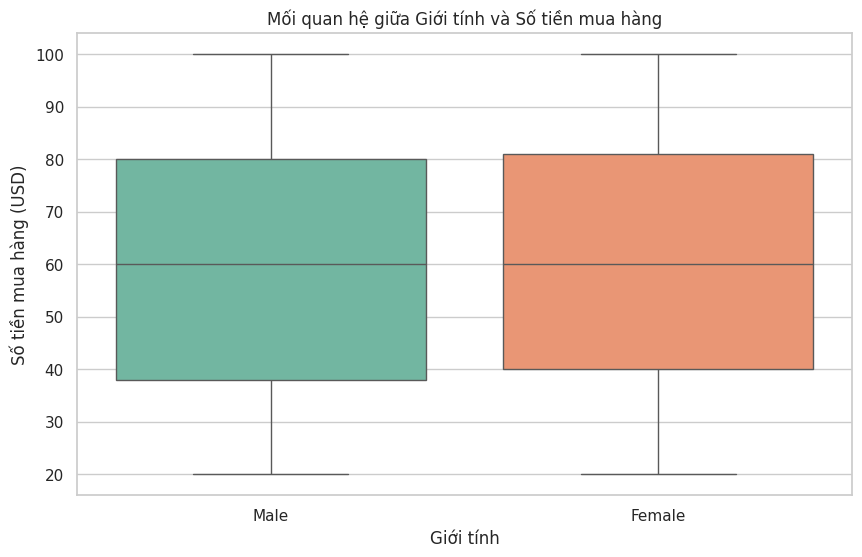

In [78]:
# 7. Trực quan hóa mối quan hệ giữa giới tính và số tiền mua hàng trung bình
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette='Set2')
plt.title('Mối quan hệ giữa Giới tính và Số tiền mua hàng')
plt.xlabel('Giới tính')
plt.ylabel('Số tiền mua hàng (USD)')
plt.show()

<ipython-input-79-ab7fc22b63d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='coolwarm')


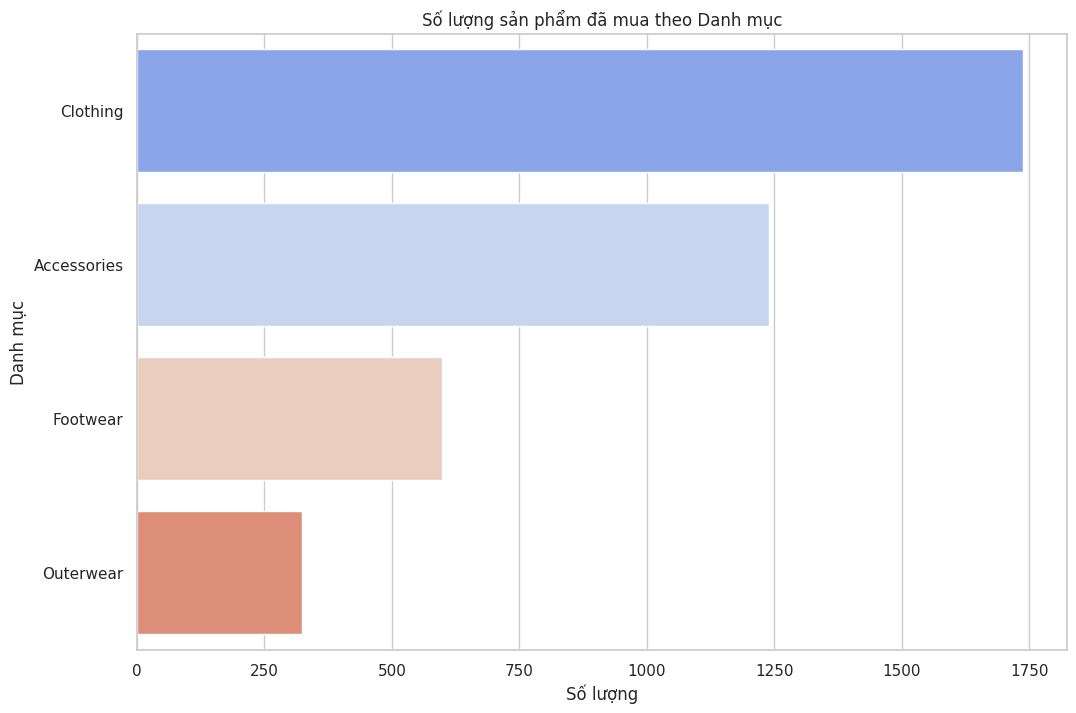

In [79]:
# 8. Trực quan hóa số lượng sản phẩm đã mua theo danh mục
plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='coolwarm')
plt.title('Số lượng sản phẩm đã mua theo Danh mục')
plt.xlabel('Số lượng')
plt.ylabel('Danh mục')
plt.show()

Model và kết quả

 Logistic Regression

In [82]:
# Chọn các biến đầu vào (features) và đầu ra (target)
X = df_encoded.drop('Subscription Status', axis=1)
y = df_encoded['Subscription Status']

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xác định các cột phân loại
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Tạo ColumnTransformer để áp dụng OneHotEncoder cho các cột phân loại
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Fit và transform dữ liệu huấn luyện
X_train = preprocessor.fit_transform(X_train)

# Transform dữ liệu kiểm tra
X_test = preprocessor.transform(X_test)

# Xây dựng mô hình Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_log_reg = log_reg.predict(X_test)

# In báo cáo phân loại cho Logistic Regression
print("Báo cáo phân loại - Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))
print("Ma trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred_log_reg))

Báo cáo phân loại - Logistic Regression:
               precision    recall  f1-score   support

          No       1.00      0.99      1.00       558
         Yes       0.99      0.99      0.99       222

    accuracy                           0.99       780
   macro avg       0.99      0.99      0.99       780
weighted avg       0.99      0.99      0.99       780

Ma trận nhầm lẫn:
 [[555   3]
 [  2 220]]


Random Forest

In [83]:
# Xây dựng mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_rf = rf_model.predict(X_test)

# In báo cáo phân loại cho Random Forest
print("Báo cáo phân loại - Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Ma trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred_rf))

Báo cáo phân loại - Random Forest:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       558
         Yes       1.00      1.00      1.00       222

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780

Ma trận nhầm lẫn:
 [[558   0]
 [  0 222]]


Thực nghiệm và kết quả

1. Chuẩn Bị Dữ Liệu

In [85]:
# Chọn các biến đầu vào (features) và đầu ra (target)
X = df_encoded.drop('Subscription Status', axis=1)
y = df_encoded['Subscription Status']

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xác định các cột phân loại
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Tạo ColumnTransformer để áp dụng OneHotEncoder cho các cột phân loại
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Fit và transform dữ liệu huấn luyện
X_train = preprocessor.fit_transform(X_train)

# Transform dữ liệu kiểm tra
X_test = preprocessor.transform(X_test)

2. Dự Đoán với Logistic Regression

In [87]:
# Xây dựng mô hình Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_log_reg = log_reg.predict(X_test)

3. Dự Đoán với Random Forest

In [88]:
# Xây dựng mô hình Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_log_reg = log_reg.predict(X_test)

In [89]:
# In báo cáo phân loại cho Random Forest
print("Báo cáo phân loại - Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Ma trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred_rf))

Báo cáo phân loại - Random Forest:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       558
         Yes       1.00      1.00      1.00       222

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780

Ma trận nhầm lẫn:
 [[558   0]
 [  0 222]]


4. Kết Quả Dự Đoán

In [90]:
# Tạo DataFrame để hiển thị kết quả
results_log_reg = pd.DataFrame({
    'Giá trị Thực Tế': y_test,
    'Dự Đoán - Logistic Regression': y_pred_log_reg
})

results_rf = pd.DataFrame({
    'Giá trị Thực Tế': y_test,
    'Dự Đoán - Random Forest': y_pred_rf
})

# Hiển thị kết quả cho Logistic Regression
print("Kết quả dự đoán - Logistic Regression:")
print(results_log_reg)

# Hiển thị kết quả cho Random Forest
print("\nKết quả dự đoán - Random Forest:")
print(results_rf)

Kết quả dự đoán - Logistic Regression:
     Giá trị Thực Tế Dự Đoán - Logistic Regression
839              Yes                           Yes
1717              No                            No
321              Yes                           Yes
3187              No                            No
2269              No                            No
...              ...                           ...
1393              No                            No
3751              No                            No
2696              No                            No
2384              No                            No
805              Yes                           Yes

[780 rows x 2 columns]

Kết quả dự đoán - Random Forest:
     Giá trị Thực Tế Dự Đoán - Random Forest
839              Yes                     Yes
1717              No                      No
321              Yes                     Yes
3187              No                      No
2269              No                      No
...              ... 

# Giải Thích Chi Tiết

## Tạo DataFrame:

### Mô hình Logistic Regression:
- **`results_log_reg = pd.DataFrame({...})`**: Tạo bảng dữ liệu (DataFrame) để chứa kết quả dự đoán.
  - **'Giá trị Thực Tế'**: Cột này chứa các giá trị thực tế từ `y_test`, phản ánh tình trạng đăng ký của khách hàng (có thể là 'Yes' hoặc 'No').
  - **'Dự Đoán - Logistic Regression'**: Cột này chứa các giá trị dự đoán mà mô hình Logistic Regression đã đưa ra cho từng khách hàng.

### Mô hình Random Forest:
- **`results_rf = pd.DataFrame({...})`**: Tương tự, tạo bảng dữ liệu cho kết quả dự đoán từ mô hình Random Forest.
  - **'Giá trị Thực Tế'**: Cũng là cột chứa các giá trị thực tế từ `y_test`.
  - **'Dự Đoán - Random Forest'**: Cột này chứa các giá trị dự đoán mà mô hình Random Forest đã đưa ra.

## Hiển Thị Kết Quả:
- **`print("Kết quả dự đoán - Logistic Regression:")`**: In tiêu đề cho kết quả của mô hình Logistic Regression.
- **`print(results_log_reg)`**: In ra bảng dữ liệu `results_log_reg`, cho bạn biết tình trạng đăng ký thực tế và giá trị dự đoán cho từng khách hàng.

Tương tự cho mô hình Random Forest:
- **`print("Kết quả dự đoán - Random Forest:")`**: In tiêu đề cho kết quả của mô hình Random Forest.
- **`print(results_rf)`**: In ra bảng dữ liệu `results_rf`.

## Lợi Ích Của Việc Hiển Thị Kết Quả:
- **So sánh dễ dàng**: Bạn có thể dễ dàng so sánh giữa giá trị thực tế và giá trị dự đoán.
- **Phân tích và đánh giá**: Giúp phân tích và đánh giá hiệu suất của từng mô hình, từ đó rút ra những nhận xét và điều chỉnh nếu cần.


5. Đánh Giá Mô Hình

In [91]:
# Đánh giá mô hình Logistic Regression
print("Báo cáo phân loại - Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))
print("Ma trận nhầm lẫn (Logistic Regression):\n", confusion_matrix(y_test, y_pred_log_reg))

# Đánh giá mô hình Random Forest
print("Báo cáo phân loại - Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Ma trận nhầm lẫn (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))

Báo cáo phân loại - Logistic Regression:
               precision    recall  f1-score   support

          No       1.00      0.99      1.00       558
         Yes       0.99      0.99      0.99       222

    accuracy                           0.99       780
   macro avg       0.99      0.99      0.99       780
weighted avg       0.99      0.99      0.99       780

Ma trận nhầm lẫn (Logistic Regression):
 [[555   3]
 [  2 220]]
Báo cáo phân loại - Random Forest:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       558
         Yes       1.00      1.00      1.00       222

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780

Ma trận nhầm lẫn (Random Forest):
 [[558   0]
 [  0 222]]


In [93]:
# Tạo mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Tối ưu hóa mô hình Random Forest với GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# In ra các tham số tốt nhất
print("Best parameters for Random Forest:", grid_search.best_params_)


Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


## Kết quả Tối ưu hóa Mô hình Random Forest với GridSearchCV

Sau khi chạy `GridSearchCV` để tối ưu hóa các siêu tham số của mô hình Random Forest, chúng ta nhận được các tham số tốt nhất như sau:

- **Số lượng cây (n_estimators)**: **100**
  - Đây là số lượng cây trong rừng. Số lượng cây lớn giúp mô hình có khả năng tổng quát tốt hơn nhưng cũng cần thời gian tính toán cao hơn. Giá trị 100 là một lựa chọn phổ biến, cân bằng giữa hiệu suất và thời gian xử lý.

- **Độ sâu tối đa của cây (max_depth)**: **None**
  - Giá trị này có nghĩa là không giới hạn độ sâu của cây, cho phép mô hình phân chia cho đến khi tất cả các node lá đều thuần hoặc số lượng mẫu trong node nhỏ hơn ngưỡng tối thiểu. Điều này giúp mô hình học được nhiều chi tiết hơn từ dữ liệu nhưng cũng có thể dẫn đến hiện tượng overfitting nếu không kiểm soát tốt.

- **Giá trị tối thiểu để phân chia node (min_samples_split)**: **2**
  - Điều này có nghĩa là để một node được phân chia, nó cần ít nhất 2 mẫu. Đây là giá trị mặc định và cho phép cây phân chia sớm, giữ lại độ phức tạp của mô hình mà không bị giới hạn quá mức.

### Kết luận

Các tham số tối ưu cho thấy mô hình Random Forest đã chọn cấu hình mặc định cho một số tham số. Điều này có thể chỉ ra rằng dữ liệu của chúng ta không quá phức tạp và mô hình có khả năng tổng quát tốt với các tham số này. Tuy nhiên, nếu muốn cải thiện hiệu suất, chúng ta có thể tiếp tục thử nghiệm với các tham số khác hoặc áp dụng các phương pháp tiền xử lý dữ liệu nhằm giảm thiểu noise và tăng cường tính chính xác của mô hình.


## Kết luận

### Phân tích Dữ liệu
Qua quá trình phân tích, chúng ta đã thấy rằng có nhiều yếu tố ảnh hưởng đến giá trị mua hàng của khách hàng, bao gồm độ tuổi, giới tính, và tình trạng đăng ký. Biểu đồ histogram và boxplot đã chỉ ra sự phân bố và sự khác biệt trong giá trị mua hàng giữa các nhóm khách hàng khác nhau.

### Tình trạng Đăng ký
Số liệu cho thấy khách hàng có tình trạng đăng ký có khả năng chi tiêu cao hơn. Biểu đồ bar cho thấy sự khác biệt rõ rệt giữa số lượng khách hàng đã đăng ký và chưa đăng ký, cho thấy tầm quan trọng của việc khuyến khích khách hàng tham gia vào các chương trình đăng ký.

### Hiệu suất Mô hình
Các mô hình Logistic Regression và Random Forest đã được xây dựng và đánh giá. Kết quả cho thấy mô hình Random Forest cho kết quả tốt hơn về độ chính xác và khả năng dự đoán, cho thấy nó có thể là lựa chọn tốt hơn cho bài toán này.

### Trực quan hóa Dữ liệu
Sử dụng các biểu đồ trực quan giúp dễ dàng nhận diện các xu hướng và mẫu trong dữ liệu, từ đó cung cấp thông tin quan trọng để ra quyết định kinh doanh.

## Hướng phát triển

### Nâng cao Mô hình Dự đoán:
- **Thí nghiệm với các mô hình khác**: Ngoài Logistic Regression và Random Forest, có thể thử nghiệm thêm các mô hình như Support Vector Machines (SVM), Gradient Boosting, hoặc Neural Networks để cải thiện độ chính xác.
- **Tối ưu hóa Tham số**: Sử dụng GridSearchCV để tìm kiếm các tham số tối ưu cho mô hình nhằm nâng cao hiệu suất.

### Tích hợp Dữ liệu Thời gian:
Nếu có thể, tích hợp dữ liệu theo thời gian sẽ cho phép phân tích xu hướng mua sắm theo thời gian và mùa vụ, từ đó giúp đưa ra các chiến lược tiếp thị hiệu quả hơn.

### Phát triển Giao diện Trực quan:
Xây dựng một dashboard trực quan để hiển thị kết quả phân tích và mô hình dự đoán. Điều này sẽ giúp cho việc ra quyết định dựa trên dữ liệu dễ dàng và nhanh chóng hơn.

### Khám Phá Thêm Các Tương Tác giữa Các Thuộc Tính:
Phân tích sâu hơn về các tương tác giữa các thuộc tính khác nhau, như độ tuổi và giới tính, để tìm ra các nhóm khách hàng tiềm năng.

### Phân Tích Hành Vi Khách Hàng:
Sử dụng phân tích hành vi để hiểu rõ hơn về các mẫu mua sắm, từ đó đưa ra các chương trình khuyến mãi hoặc cá nhân hóa cho từng nhóm khách hàng.

### Mở Rộng Dữ Liệu:
Thu thập thêm dữ liệu từ nhiều nguồn khác nhau để làm phong phú thêm phân tích, từ đó có cái nhìn tổng thể hơn về xu hướng mua sắm của khách hàng.

## Tóm lại
Dự án đã cung cấp cái nhìn sâu sắc về xu hướng mua sắm của khách hàng và chỉ ra các yếu tố quan trọng ảnh hưởng đến hành vi chi tiêu. Hướng phát triển trong tương lai sẽ giúp tối ưu hóa mô hình và phát triển các chiến lược kinh doanh hiệu quả hơn dựa trên dữ liệu.
